## Observations and Insights 

In [60]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# (("k403","Ramicane","Male",21,16) , (b128,0,45,0))
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="inner", on = "Mouse ID")
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [61]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].nunique()

249

In [62]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_data = combined_data.loc[combined_data.duplicated(subset=None, keep='first') == True]
duplicated_mouse_ids = duplicate_mouse_data['Mouse ID']
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [63]:
# Optional: Get all the data for the duplicate mouse ID. 

combined_data.loc[combined_data['Mouse ID'].isin(duplicated_mouse_ids)]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_mouse_data = combined_data.loc[~combined_data['Mouse ID'].isin(duplicated_mouse_ids)]
cleaned_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [65]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_data['Mouse ID'].nunique()

248

## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_volume = cleaned_mouse_data['Tumor Volume (mm3)']

mean_numpy = np.mean(tumor_volume)
print(f"The mean tumor volume is {mean_numpy}")

median_numpy = np.median(tumor_volume)
print(f"The median tumor volume is {median_numpy}")

var_numpy = np.var(tumor_volume,ddof = 0)
print(f"The study variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(tumor_volume,ddof = 0)
print(f"The study standard deviation using the NumPy module is {sd_numpy}")

sem_numpy = np.std(tumor_volume, ddof=1) / np.sqrt(np.size(tumor_volume))
print(f"The study standard error of mean (SEM) using the NumPy module is {sem_numpy}")

# This method is the most straighforward, creating multiple series and putting them all together at the end.



The mean tumor volume is 50.435293232255326
The median tumor volume is 48.933453655
The study variance using the NumPy module is 79.42063964177214
The study standard deviation using the NumPy module is 8.911825830982792
The study standard error of mean (SEM) using the NumPy module is 0.2055906218698623


In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

print(f"The summary statistics table:")

summary_statistics_table_df = pd.DataFrame({
    'Mean': mean_numpy,
    'Median': median_numpy ,
    'Variance': var_numpy,
    'SD': sd_numpy,
    'SEM': sem_numpy,
}, index = [0])

summary_statistics_table_df

The summary statistics table:


,Mean,Median,Variance,SD,SEM
0,50.435293,48.933454,79.42064,8.911826,0.205591


## Bar and Pie Charts

In [68]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
cleaned_mouse_metadata = mouse_metadata.loc[~mouse_metadata['Mouse ID'].isin(duplicated_mouse_ids)]
cleaned_mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [69]:
mouse_data_drug_df = cleaned_mouse_metadata.groupby(['Drug Regimen'])["Mouse ID"].count().reset_index(name='Number of mouse')

mouse_data_drug_df

,Drug Regimen,Number of mouse
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


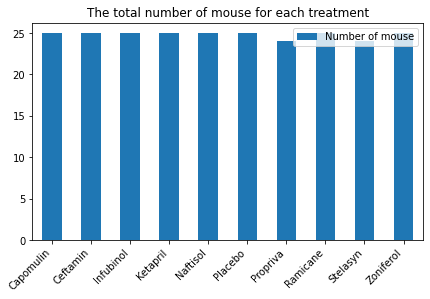

<Figure size 432x288 with 0 Axes>

In [70]:
bar_plot = mouse_data_drug_df.plot(kind="bar", figsize=(7,4))
bar_plot.set_xticklabels(mouse_data_drug_df["Drug Regimen"], rotation=45,horizontalalignment="right")

plt.title("The total number of mouse for each treatment")
plt.show()
plt.tight_layout()

In [71]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mouse_data_drug_df = cleaned_mouse_metadata.groupby(['Drug Regimen'])["Mouse ID"].count().reset_index(name='Number of mouse')

mouse_data_drug_df

,Drug Regimen,Number of mouse
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


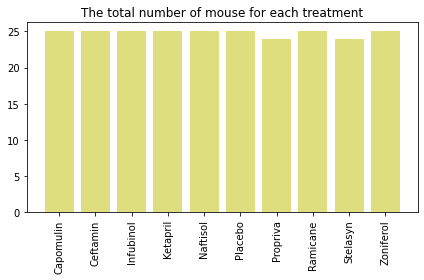

In [72]:
x_axis = np.arange(len(mouse_data_drug_df))
tick_locations = [value for value in x_axis]

#x_axis = np.arange(mouse_data_drug_df["Drug Regimen"])

plt.bar(x_axis, mouse_data_drug_df["Number of mouse"], color = 'y', alpha=0.5, align="center")
plt.xticks(tick_locations, mouse_data_drug_df["Drug Regimen"], rotation="vertical")
plt.title("The total number of mouse for each treatment")
plt.tight_layout()

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_mouse_df = cleaned_mouse_metadata.groupby(['Sex'])["Mouse ID"].count().reset_index(name='Number of mouse')
gender_mouse_df



,Sex,Number of mouse
0,Female,123
1,Male,125


In [74]:
gender_mouse_df = cleaned_mouse_metadata.Sex.value_counts()
gender_mouse_df

Male      125
Female    123
Name: Sex, dtype: int64

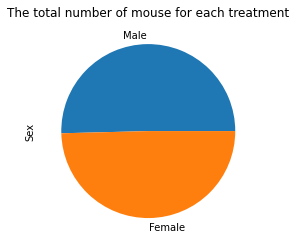

<Figure size 432x288 with 0 Axes>

In [75]:
pie_plot = gender_mouse_df.plot(kind="pie", subplots=True)
#pie_plot.set_xticklabels(mouse_data_drug_df["Drug Regimen"], rotation=45,horizontalalignment="right")

plt.title("The total number of mouse for each treatment")
plt.show()
plt.tight_layout()

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_mouse_df = cleaned_mouse_metadata.groupby(['Sex'])["Mouse ID"].count().reset_index(name='Number of mouse')
gender_mouse_df


,Sex,Number of mouse
0,Female,123
1,Male,125


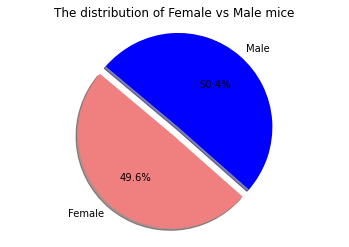

In [77]:
pies = gender_mouse_df['Sex']
pie_gender = gender_mouse_df['Number of mouse']
colors = ["lightcoral","blue"]
explode = (0.1,0)

plt.pie(pie_gender, explode=explode, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("The distribution of Female vs Male mice")
plt.savefig("data/PyPies.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = ['Capomulin','Ramicane','Infubinol','Infubinol']
four_treatments_df = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'].isin(four_treatments)]
four_treatments_df
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume = four_treatments_df.sort_values(['Timepoint'],ascending=False).groupby('Mouse ID').head(1)
final_tumor_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
430,a444,Ramicane,Female,10,25,45,43.047543,0
144,m957,Capomulin,Female,3,19,45,33.329098,1
390,r944,Capomulin,Male,12,25,45,41.581521,2
400,e662,Ramicane,Male,8,24,45,40.659006,2
...,...,...,...,...,...,...,...,...
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1314,o813,Infubinol,Male,24,28,5,45.699331,0
1616,v339,Infubinol,Male,20,26,5,46.250112,0
449,w678,Ramicane,Female,5,24,5,43.166373,0


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_volumes = final_tumor_volume['Tumor Volume (mm3)']
quartiles = tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Locate the rows which contain mice on each drug and get the tumor volumes


# add subset 


# Determine outliers using upper and lower bounds
outliers = final_tumor_volume.loc[(tumor_volumes > upper_bound) | (tumor_volumes < lower_bound)]
outliers

The lower quartile of Tumor Volume (mm3) is: 35.248172675
The upper quartile of Tumor Volume (mm3) is: 52.795519135
The interquartile range of Tumor Volume (mm3) is: 17.54734646
The the median of Tumor Volume (mm3) is: 40.1592203 
Values below 8.927152985 could be outliers.
Values above 79.11653882499999 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


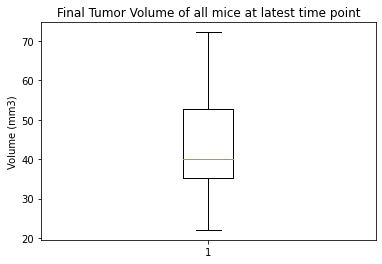

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume of all mice at latest time point')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(tumor_volumes)
plt.show()

## Line and Scatter Plots

In [81]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mice_Capomulin = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']
a_Capomulin_mouse_id = mice_Capomulin[['Mouse ID','Timepoint','Tumor Volume (mm3)']].groupby(['Mouse ID'])['Timepoint'] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(1)['Mouse ID']
mouse_Capomulin = mice_Capomulin.loc[mice_Capomulin['Mouse ID'].isin(a_Capomulin_mouse_id)].sort_values(['Timepoint'])


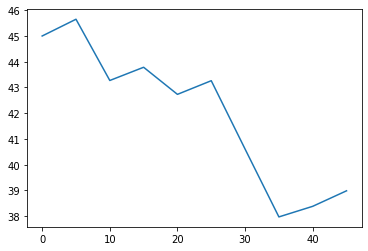

In [82]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.plot(mouse_Capomulin['Timepoint'], mouse_Capomulin['Tumor Volume (mm3)'])
# Show the graph that we have created
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84


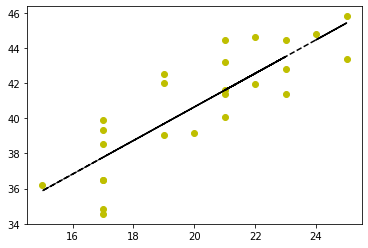

In [83]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight_data = mice_Capomulin[['Mouse ID','Weight (g)']].drop_duplicates()
volume_data = mice_Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index(name='average volume')
regression_data = weight_data.merge(volume_data,how='inner',on='Mouse ID')
x = regression_data['Weight (g)']
y = regression_data['average volume']

correlation = sts.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker